In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print(df['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
df['Species'] = df['Species'].replace(('Iris-setosa','Iris-versicolor','Iris-virginica'),
                                      (0,1,2))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Id','Species'],axis=1).values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data Shape     :', X.shape, y.shape)
print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape  :', X_test.shape, y_test.shape)

Data Shape     : (150, 4) (150,)
Training Shape : (120, 4) (120,)
Testing Shape  : (30, 4) (30,)


In [ ]:
import keras

model = keras.models.Sequential([
                                 keras.layers.Dense(16, activation='relu', input_dim=4),
                                 keras.layers.Dense(16, activation='relu'),
                                 keras.layers.Dense(3, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=10, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 7ms/step - loss: 1.5363 - accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1982 - accuracy: 0.3250
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0288 - accuracy: 0.6667
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.9353 - accuracy: 0.6833
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8493 - accuracy: 0.8083
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7696 - accuracy: 0.7667
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7097 - accuracy: 0.8833
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6650 - accuracy: 0.8583
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.9333
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.8833
Epoch 

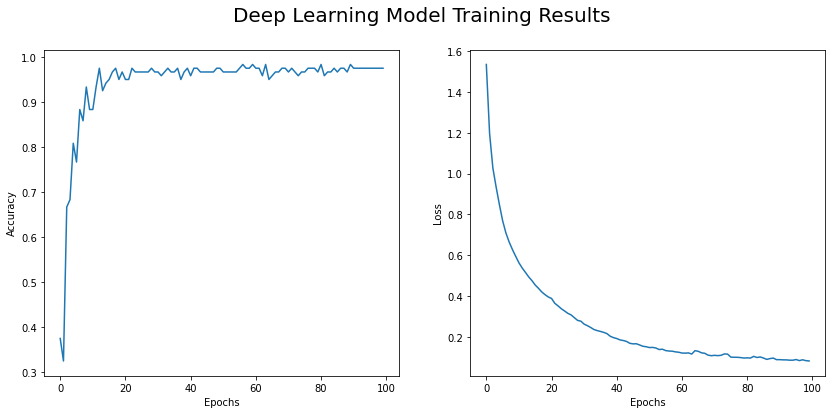

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

#accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

#loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.suptitle('Deep Learning Model Training Results', fontsize=20)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

array([0.00140798, 0.95359886, 0.04499317], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

print(y_pred[:5])
print(y_test[:5])

[1 0 2 1 1]
[1 0 2 1 1]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



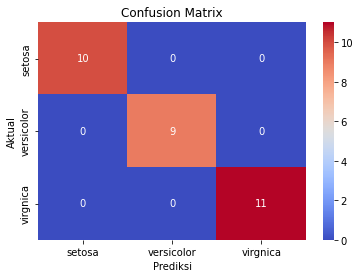

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5, 2.5],['setosa','versicolor','virgnica'])
plt.yticks([0.5, 1.5, 2.5],['setosa','versicolor','virgnica'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()